In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [141]:
df = pd.read_csv("Advertising.csv")

In [142]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [143]:
X=df.drop('sales',axis=1)
y=df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)
df4 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred3})
print('Mean square error is :'+ str(mean_squared_error(y_test, y_pred3, squared=True)))
print('Root Mean square error is :'+ str(mean_squared_error(y_test, y_pred3, squared=False)))
print('Residual sum of squares of degree :'+ str(np.sum(np.square(df4['Predicted'] - df4['Actual']))))

Mean square error is :2.291305689577221
Root Mean square error is :1.5137059455446493
Residual sum of squares of degree :91.65222758308884


In [145]:
#Ridge Regression with cross validation
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
Z_test = ss.fit_transform(X_test)
Z_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
ridge_model = ridge_model.fit(Z_train, y_train)
y_pred2= ridge_model.predict(Z_test)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred2})
print('Mean square error is :'+ str(mean_squared_error(y_test, y_pred2, squared=True)))
print('Root Mean square error is :'+ str(mean_squared_error(y_test, y_pred2, squared=False)))
print('Residual sum of squares of degree :'+ str(np.sum(np.square(df3['Predicted'] - df3['Actual']))))

Mean square error is :2.2441947006905396
Root Mean square error is :1.4980636504136062
Residual sum of squares of degree :89.76778802762159


Degree:1
Mean square error of degree 1 is :2.2913056895772184
RMSE of degree 1 is :1.5137059455446484
Residual sum of squares of degree 1 is :91.65222758308873
------------------------------------------------------------------------------------------------------------
Degree:2
Mean square error of degree 2 is :0.3569258391305822
RMSE of degree 2 is :0.5974327067800876
Residual sum of squares of degree 2 is :14.277033565223286
------------------------------------------------------------------------------------------------------------
Degree:3
Mean square error of degree 3 is :0.2687925082362712
RMSE of degree 3 is :0.5184520307957827
Residual sum of squares of degree 3 is :10.751700329450848
------------------------------------------------------------------------------------------------------------
Degree:4
Mean square error of degree 4 is :0.4020167600666881
RMSE of degree 4 is :0.6340479162229682
Residual sum of squares of degree 4 is :16.080670402667522
------------------------------

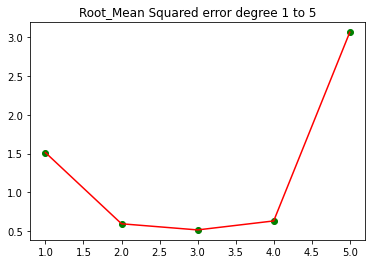

In [171]:
#Polynomial regresssion
#Best degree through Root mean square error,mean square error and Residual sum of squares (Note 3 is the best degree in polynomial regression)
number_degrees = [1,2,3,4,5,6,7,8,9,10]
number_degreess = [1,2,3,4,5]
plt_mean_squared_error = []
for degree in number_degrees:
  #visualizing only degrees from 1 to 5
   if(len(plt_mean_squared_error)==5):
      plt.title("Root_Mean Squared error degree 1 to 5")
      plt.scatter(number_degreess,plt_mean_squared_error, color="green")
      plt.plot(number_degreess,plt_mean_squared_error, color="red")
   poly_model = PolynomialFeatures(degree=degree)
   poly_x_train = poly_model.fit_transform(X_train)
   poly_x_test = poly_model.fit_transform(X_test)
   regression_model = LinearRegression()
   regression_model.fit(poly_x_train, y_train)
   y_pred = regression_model.predict(poly_x_test)
   df2 = pd.DataFrame({'Actual': y_test, 'Predicted':
    y_pred})
   print('Degree:'+ str(degree ))
   print('Mean square error of degree '+ str(degree ) +' is :'+ str(mean_squared_error(y_test, y_pred, squared=True)))
   print('RMSE of degree '+ str(degree ) +' is :'+ str(mean_squared_error(y_test, y_pred, squared=False)))
   print('Residual sum of squares of degree '+ str(degree ) +' is :'+ str(np.sum(np.square(df2['Predicted'] - df2['Actual']))))
   print('------------------------------------------------------------------------------------------------------------')
   plt_mean_squared_error.append(mean_squared_error(y_test, y_pred, squared=False))

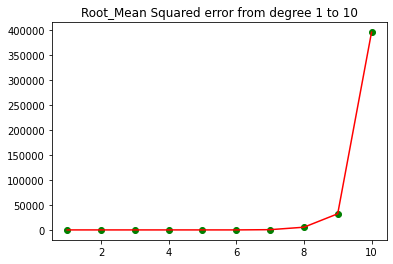

In [170]:
#Plotting degrees from 1 to 10,but the above code plot from 1 to 5 to be abl to understand more the data
plt.title("Root_Mean Squared error from degree 1 to 10")
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")

In [172]:
#Polynomial regression degree 3
poly_model = PolynomialFeatures(3)
poly_x_train = poly_model.fit_transform(X_train)
poly_x_test=poly_model.fit_transform(X_test)
regression_model = LinearRegression()
regression_model.fit(poly_x_train, y_train)

LinearRegression()

In [173]:
from joblib import dump, load
dump(regression_model, 'optimal_polyreg_model')

['optimal_polyreg_model']

In [174]:
loaded_model = load('optimal_polyreg_model')

In [175]:
campaign = [[149,22,12]]
campaign_modified=poly_model.fit_transform(campaign)
loaded_model.predict(campaign_modified)

array([14.65926665])